In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



In [29]:
data=  pd.read_csv(r'/Users/shikhathakur/Downloads/SpaData.csv')
data.head()

,ID,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,2342,06-02-15 8:51,20.840,19.745000,433.0,629.75,0.003000,1
1,6419,09-02-15 4:49,19.290,26.890000,0.0,466.00,0.003716,0
2,3330,07-02-15 1:20,20.000,18.700000,0.0,435.50,0.002696,0
3,7188,09-02-15 17:38,22.200,38.433333,429.5,1943.50,0.006381,1
4,7655,10-02-15 1:25,20.245,32.900000,0.0,469.00,0.004833,0


In [30]:
x= data.drop(['TimeStamp','GTOccupancy'], axis =1)
x.head()
y=data['GTOccupancy']
y.head()
x.shape

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [40]:
'''
THIS IS THE MAIN CODE '''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features_train = scaler.transform(X_train)
x_new_train = pd.DataFrame(scaled_features_train,columns=X_train.columns[0:])
x_new_train.head()

#testing scaling 
scaler.fit(X_test)
scaled_features_t = scaler.transform(X_test)
x_new_test = pd.DataFrame(scaled_features_t,columns=X_test.columns[0:])
x_new_test.head()


#Create KNN Classifier
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(x_new_train, y_train)
y_p = knn.predict(x_new_test)
print(classification_report(y_test, y_p))
print(confusion_matrix(y_test,y_p))

from sklearn.metrics import accuracy_score
ac= accuracy_score(y_test,y_p)
print('accuracy score' , ac)

final_df = pd.DataFrame()
print(final_df)
final_df['ID'] = X_test['ID']
final_df['Output'] = y_p
final_df.reset_index(inplace=True)
final_df.drop('index')
final_df.to_csv(r'/Users/shikhathakur/Desktop/Spaoutput.csv')
print(final_df.head())

'''this is the main code '''

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1016
           1       0.98      0.98      0.98       287

    accuracy                           0.99      1303
   macro avg       0.98      0.99      0.99      1303
weighted avg       0.99      0.99      0.99      1303

[[1009    7]
 [   6  281]]
accuracy score 0.990023023791251
Empty DataFrame
Columns: []
Index: []


KeyError: "['index'] not found in axis"

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)
df_feat = pd.DataFrame(scaled_features,columns=x.columns[0:])
df_feat.head()

,ID,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio
0,-0.741819,0.219283,-1.089168,1.610358,0.069733,-1.017811
1,0.992449,-1.299572,0.203200,-0.614264,-0.448103,-0.177316
2,-0.321545,-0.603838,-1.278185,-0.614264,-0.544555,-1.374309
3,1.319565,1.551957,2.291126,1.592376,4.224281,2.950898
4,1.518217,-0.363761,1.290272,-0.614264,-0.438616,1.133607


In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.2) # 70% training and 30% test


In [20]:
#Create KNN Classifier
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train, y_train)
y_p = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
ac= accuracy_score(y_test,y_p)
print('accuracy score' , ac)




              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1023
           1       0.99      0.97      0.98       280

    accuracy                           0.99      1303
   macro avg       0.99      0.99      0.99      1303
weighted avg       0.99      0.99      0.99      1303

[[1020    3]
 [   7  273]]
accuracy score 0.9877206446661551


In [12]:
import numpy as np
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

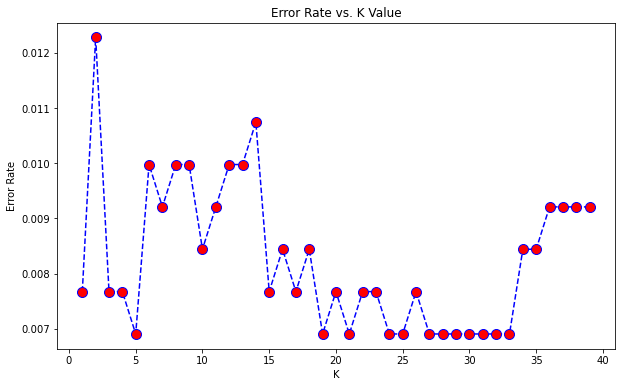

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

RMSE value for k=  1 is: 0.08760477774444216
RMSE value for k=  2 is: 0.07586796301957653
RMSE value for k=  3 is: 0.07726015185762664
RMSE value for k=  4 is: 0.07459278038556079
RMSE value for k=  5 is: 0.07266445343875738
RMSE value for k=  6 is: 0.07530388112049971
RMSE value for k=  7 is: 0.07488093618522092
RMSE value for k=  8 is: 0.07515333519712189
RMSE value for k=  9 is: 0.07633484719869249
RMSE value for k=  10 is: 0.07652266053155314
RMSE value for k=  11 is: 0.07737864210292789
RMSE value for k=  12 is: 0.07781005311650294
RMSE value for k=  13 is: 0.07774517895721966
RMSE value for k=  14 is: 0.07656153932084901
RMSE value for k=  15 is: 0.07681739662550369
RMSE value for k=  16 is: 0.07655634490192763
RMSE value for k=  17 is: 0.0772123984988042
RMSE value for k=  18 is: 0.07794692226910167
RMSE value for k=  19 is: 0.07786619477541556
RMSE value for k=  20 is: 0.0768229468149279


<AxesSubplot:>

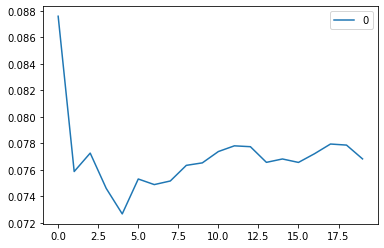

In [15]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [16]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [17]:
#Create KNN Classifier
from sklearn.metrics import classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print()
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1023
           1       0.99      0.97      0.98       280

    accuracy                           0.99      1303
   macro avg       0.99      0.99      0.99      1303
weighted avg       0.99      0.99      0.99      1303

[[1020    3]
 [   7  273]]


0.9877206446661551